<H1 align=center><strong>Classificazione Vinho Verde</strong></H1>

## Tabella dei Contenuti
1. [Introduzione](#introduction)
2. [Analisi esplorativa dei dati](#paragraph1)
3. [Definizione del problema](#paragraph2)
4. [Preprocessing](#paragraph3)
5. [AdaBoost](#paragraph4)
6. [Support Vector Classifier](#paragraph5)
7. [XGBoost](#paragraph6)
8. [Conclusioni](#conclusions)

##  <span style="color:black">1. Introduzione<span> <a name="introduction"></a>

Il *Vinho Verde* è un vino Portoghese, originario della provincia storica di Minho. Può essere rosso, bianco o rosé e viene consumato poco dopo l'imbottigliamento, tipicamente entro un anno da tale data. Solitamente, si presenta come un vino leggermente effervescente: tale caratteristica era originariamente dovuta alla fermentazione malolattica, considerata un difetto dai produttori di vino. Tuttavia, la sua tipica effervescenza risultava piacevole per i consumatori e ciò portò all'abbandono della pratica naturale, sostituita da una carbonazione artificiale.

![alt text](vinhoverde.jpg)

## <span style="color:black">2. Analisi esplorativa dei dati<span> <a name="paragraph1"></a>

In [44]:
import numpy as np
import pandas as pd

wine = pd.read_csv('wine_quality_train.csv')
wine_t = pd.read_csv('wine_quality_test.csv')

In [3]:
wine.head()

ID  fixed.acidity  volatile.acidity  citric.acid  residual.sugar  \
0   1            7.0              0.27         0.36            20.7   
1   2            6.3              0.30         0.34             1.6   
2   4            7.2              0.23         0.32             8.5   
3   5            7.2              0.23         0.32             8.5   
4   7            6.2              0.32         0.16             7.0   

   chlorides  free.sulfur.dioxide  total.sulfur.dioxide  density    pH  \
0      0.045                 45.0                 170.0   1.0010  3.00   
1      0.049                 14.0                 132.0   0.9940  3.30   
2      0.058                 47.0                 186.0   0.9956  3.19   
3      0.058                 47.0                 186.0   0.9956  3.19   
4      0.045                 30.0                 136.0   0.9949  3.18   

   sulphates  alcohol   quality  
0       0.45      8.8  AvgOrLow  
1       0.49      9.5  AvgOrLow  
2       0.40      9.9  AvgOrLow  
3       0.40      9.9  AvgOrLow  
4       0.47      9.6  AvgOrLow

In [4]:
wine_t.head()

ID  fixed.acidity  volatile.acidity  citric.acid  residual.sugar  \
0   3            8.1              0.28         0.40             6.9   
1   6            8.1              0.28         0.40             6.9   
2  13            7.9              0.18         0.37             1.2   
3  16            6.6              0.17         0.38             1.5   
4  17            6.3              0.48         0.04             1.1   

   chlorides  free.sulfur.dioxide  total.sulfur.dioxide  density    pH  \
0      0.050                 30.0                  97.0   0.9951  3.26   
1      0.050                 30.0                  97.0   0.9951  3.26   
2      0.040                 16.0                  75.0   0.9920  3.18   
3      0.032                 28.0                 112.0   0.9914  3.25   
4      0.046                 30.0                  99.0   0.9928  3.24   

   sulphates  alcohol  
0       0.44     10.1  
1       0.44     10.1  
2       0.63     10.8  
3       0.55     11.4  
4       0.36      9.6

In [5]:
wine.quality.unique()

array(['AvgOrLow', 'High'], dtype=object)

Il dataset comprende le seguenti caratteristiche:
* ID: codice identificativo per il vino analizzato
* fixed.acidity: L'acidità fissa è costituita dalle sostanze acide presenti in un vino, che non sono portate a volatilizzare, ma al contrario restano all'interno del vino per tutta la sua vita
* volatile.acidity: L'acidità volatile è costituita da molecole che tendono a e disperdersi nell'aria. Sono pertanto evaporabili quando si distilla.
* citric.acid: L'acido citrico è una sostanza perfettamente solubile nei vini, anche presente negli stessi in maniera naturale, soprattutto in quelli che non hanno realizzato la fermentazione malolattica, dato che i batteri lattici sono in grado di degradarlo completamente.
* resiudual.sugar: Con zucchero residuo si intende lo zucchero non fermentato rimasto nel vino al termine della fermentazione, sia perché i lieviti non sono più attivi, sia perché il processo di fermentazione è stato interrotto artificialmente. A seconda del tenore di zucchero residuo, i vini vengono distinti in secco, abboccato, amabile o dolce.
* chlorides: I vini contengono cloruri sia naturalmente - in funzione delle caratteristiche varietali, ambientali, pedologiche e delle tecniche di vinificazione – che a seguito di aggiunte in fase di vinificazione (principalmente NaCl e LiCl) apportate un tempo a scopi vari, tra cui quello di elevare l’estratto secco e migliorare la sapidità del vino.
* free.sulfur.dioxide: L'anidride solforosa svolge un'azione antisettica, impendendo il proliferare della flora batterica e la nascita di micro-organismi che potrebbero danneggiare il vino nel gusto e nel colore. Tale proprietà è particolarmente importante durante la fermentazione e la conservazione. Una parte di questo gas si combina con alcuni componenti del mosto o del vino, mentre la restante parte resta libera.
* total.sulfur.dioxide: L'anidride solforosa totale è la somma tra l'anidride solforosa libera e combinata, dove quest'ultima indica la parte di gas che si è legata a componenti del mosto ma che risulta comunque utile per sostituire la parte di anidride solforosa libera che si disperde nelle operazioni quali il travaso.
* density: La densità è calcolata in g/ml
* pH: Il pH del vino è un indicatore dell'acidità dello stesso. Non influenza solo il colore del vino, ma anche l'ossidazione, la fermentazione dei lieviti, la stabilità proteica, lo sviluppo dei batteri e la fermentazione.
* sulphates: I solfiti sono molecole composte da ossigeno e zolfo il cui compito è quello di prevenire l'ossidazione degli alimenti. Svolgono quindi una funzione antiossidante e antimicrobica, e possono essere presenti sia naturalmente, sia aggiunti.
* alcohol: Indicatore della quantità di alcool nel vino.

Inoltre, l'insieme per l'addestramento comprende una label che indica la qualità del vino che può essere:
* AvgOrLow: Media o bassa qualità
* High: Alta qualità

In [6]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3266 entries, 0 to 3265
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    3266 non-null   int64  
 1   fixed.acidity         3266 non-null   float64
 2   volatile.acidity      3266 non-null   float64
 3   citric.acid           3266 non-null   float64
 4   residual.sugar        3266 non-null   float64
 5   chlorides             3266 non-null   float64
 6   free.sulfur.dioxide   3266 non-null   float64
 7   total.sulfur.dioxide  3266 non-null   float64
 8   density               3266 non-null   float64
 9   pH                    3266 non-null   float64
 10  sulphates             3266 non-null   float64
 11  alcohol               3266 non-null   float64
 12  quality               3266 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 331.8+ KB


Il dataset di addestramento è composto da 3266 osservazioni, e nessuna di queste risulta avere caratteristiche mancanti.

In [7]:
wine_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1632 entries, 0 to 1631
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    1632 non-null   int64  
 1   fixed.acidity         1632 non-null   float64
 2   volatile.acidity      1632 non-null   float64
 3   citric.acid           1632 non-null   float64
 4   residual.sugar        1632 non-null   float64
 5   chlorides             1632 non-null   float64
 6   free.sulfur.dioxide   1632 non-null   float64
 7   total.sulfur.dioxide  1632 non-null   float64
 8   density               1632 non-null   float64
 9   pH                    1632 non-null   float64
 10  sulphates             1632 non-null   float64
 11  alcohol               1632 non-null   float64
dtypes: float64(11), int64(1)
memory usage: 153.1 KB


Analogamente, il test set non presenta dati mancanti e le osservazioni risultano essere 1632.

La variabile predittiva è, chiaramente, la qualità del vino. Pertanto, è importante verificare se le classi "High" e "AvgOrLow" sono bilanciate:

In [8]:
wine.quality.value_counts()

AvgOrLow    2555
High         711
Name: quality, dtype: int64

Si evidenzia uno sbilanciamento tra le classi di circa 1:3.6.

## <span style="color:black">3. Definizione del problema<span> <a name="paragraph2"></a>

Per il dataset analizzato si richiede un problema di classificazione binaria: riconoscere, in base alle caratteristiche che si hanno a disposizione, se un vino è di medio/bassa o alta qualità. Una prima fase consisterà nell'addestramento degli algoritmi da utilizzare con il training set, mentre in un secondo tempo si effettuerà una classificazione sul test set.
Le decisioni prese sul test set sono riassumibili in una tabella nota come *tabella di confusione*, così composta:

|           |Actual +|Actual -|
|-----------|--------|--------|
|Predicted +|TP      |FP      |
|Predicted -|FN      |TN      |

e, da tale tabella è possibile ricavarne diverse misure di accuratezza per la previsione effettuata. Due esempi classici sono:
* *Precision* 
$\frac{TP}{TP + FP}$
* *Recall* 
$\frac{TP}{TP + FN}$

La misura di precisione che si prenderà in esame è l'f1-score, che si definisce come 

\begin{equation}
F_1 = 2 \cdot \frac{\text{precision} \times \text{recall}}{\text{precision} + \text{recall}}
\end{equation}

e si richiede un'attenzione particolare alla classificazione di vini di alta qualità: scartare vini di alta qualità è chiaramente uno spreco peggiore che mettere in vendita vini di medio/bassa qualità. Questa richiesta permette di introdurre l'f2-score, metrica che permette di considerare i falsi negativi più costosi dei falsi positivi:

\begin{equation}
F_2 = 5 \cdot \frac{\text{precision} \times \text{recall}}{4 \cdot \text{precision} + \text{recall}}
\end{equation}

In [9]:
from sklearn.metrics import f1_score

## <span style="color:black">4. Preprocessing<span> <a name="paragraph3"></a>

In una prima fase, è necessario preprocessare i dati in modo da rendere l'addestramento dei modelli più efficiente. A tal fine, una delle strategie fondamentali consiste nello scalare i dati standardizzandoli. Vi sono due strade possibili da seguire:

* Standardizzare il training set ed utilizzare media e deviazione standard trovate per scalare il test set (che pertanto non avrà media nulla e deviazione standard unitaria);
* Standardizzare l'insieme completo formato da training e test set per poi separarli nuovamente.

Si è scelto di seguire il secondo metodo.
Inoltre, a causa dello sbilanciamento tra le classi, si è deciso di utilizzare lo SMOTE, una tecnica che consiste nel simulare punti della classe minoritaria per bilanciare il le osservazioni.

In [45]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
wine['quality'] = le.fit_transform(wine['quality'])

In [46]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

wine.drop('ID', axis=1, inplace=True)
Xt = wine.iloc[:,:-1]
y = wine['quality']
sm = SMOTE()
X_res, y_res = sm.fit_resample(Xt, y)
y = y_res
X1 = X_res.append(wine_t.drop('ID', axis=1), ignore_index=True)
scaler = StandardScaler()
scal = pd.DataFrame(scaler.fit_transform(X1), columns=X1.columns)
test = scal.iloc[-1632:,:]
train = scal.iloc[:-1632,:]

Una pratica fondamentale prima dell'inizio dell'analisi consiste nella visualizzazione delle principali caratteristiche del dataset, che possono influenzare la scelta del modello.

In [181]:
train.describe()

fixed.acidity  volatile.acidity  citric.acid  residual.sugar  \
count    5110.000000       5110.000000  5110.000000     5110.000000   
mean       -0.020015         -0.015259     0.002280       -0.028759   
std         0.989794          0.980606     0.967981        0.976202   
min        -3.791143         -2.034040    -3.060252       -1.115637   
25%        -0.650984         -0.673627    -0.486648       -0.869885   
50%        -0.061741         -0.150391    -0.120618       -0.316943   
75%         0.594058          0.477493     0.394640        0.572541   
max         9.271918          8.639973    12.197547        5.232963   

         chlorides  free.sulfur.dioxide  total.sulfur.dioxide      density  \
count  5110.000000          5110.000000           5110.000000  5110.000000   
mean     -0.038013            -0.005179             -0.028447    -0.056293   
std       0.940576             0.965451              0.984113     0.979699   
min      -1.780894            -2.071166             -3.057169    -2.149303   
25%      -0.501847            -0.692632             -0.752199    -0.822420   
50%      -0.183148            -0.066026             -0.139175    -0.257082   
75%       0.214420             0.560580              0.596454     0.640808   
max      13.158383             6.983293              5.684552     5.562577   

                pH    sulphates      alcohol  
count  5110.000000  5110.000000  5110.000000  
mean      0.022848     0.013848     0.070085  
std       0.994790     0.994098     1.000667  
min      -3.238996    -2.316864    -2.165711  
25%      -0.651082    -0.731692    -0.832754  
50%      -0.038155    -0.115236     0.108156  
75%       0.710978     0.589284     0.892248  
max       4.116128     4.992539     2.538842

In [182]:
test.describe()

fixed.acidity  volatile.acidity  citric.acid  residual.sugar  \
count    1632.000000       1632.000000  1632.000000     1632.000000   
mean        0.062671          0.047779    -0.007138        0.090047   
std         1.029396          1.057608     1.094779        1.066695   
min        -3.665537         -2.034040    -3.060252       -1.115637   
25%        -0.525378         -0.673627    -0.578562       -0.890364   
50%        -0.022953         -0.150391    -0.118990       -0.163347   
75%         0.605079          0.477493     0.432497        0.809422   
max         4.875695          7.227236     8.245226       12.236903   

         chlorides  free.sulfur.dioxide  total.sulfur.dioxide      density  \
count  1632.000000          1632.000000           1632.000000  1632.000000   
mean      0.119025             0.016216              0.089071     0.176261   
std       1.159200             1.101629              1.043788     1.042162   
min      -1.627408            -2.008505             -3.081690    -2.112722   
25%      -0.399523            -0.755293             -0.654115    -0.607093   
50%      -0.041389            -0.128687             -0.016570     0.075470   
75%       0.316744             0.685901              0.768100     0.900199   
max      15.460669            15.912431              7.486843    15.100168   

                pH    sulphates      alcohol  
count  1632.000000  1632.000000  1632.000000  
mean     -0.071539    -0.043360    -0.219446  
std       1.013422     1.017650     0.966164  
min      -2.762275    -2.404929    -1.852074  
25%      -0.719185    -0.731692    -1.009175  
50%      -0.106258    -0.203302    -0.362299  
75%       0.506669     0.501219     0.421793  
max       4.252334     5.168669     2.695660

Chiaramente, i due dataset non hanno media nulla e deviazione standard unitaria in quanto la standardizzazione si è effettuata sull'intero dataset.

/tmp/ipykernel_2533/884938005.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scal.iloc[-1632:,:]['index'] = 1


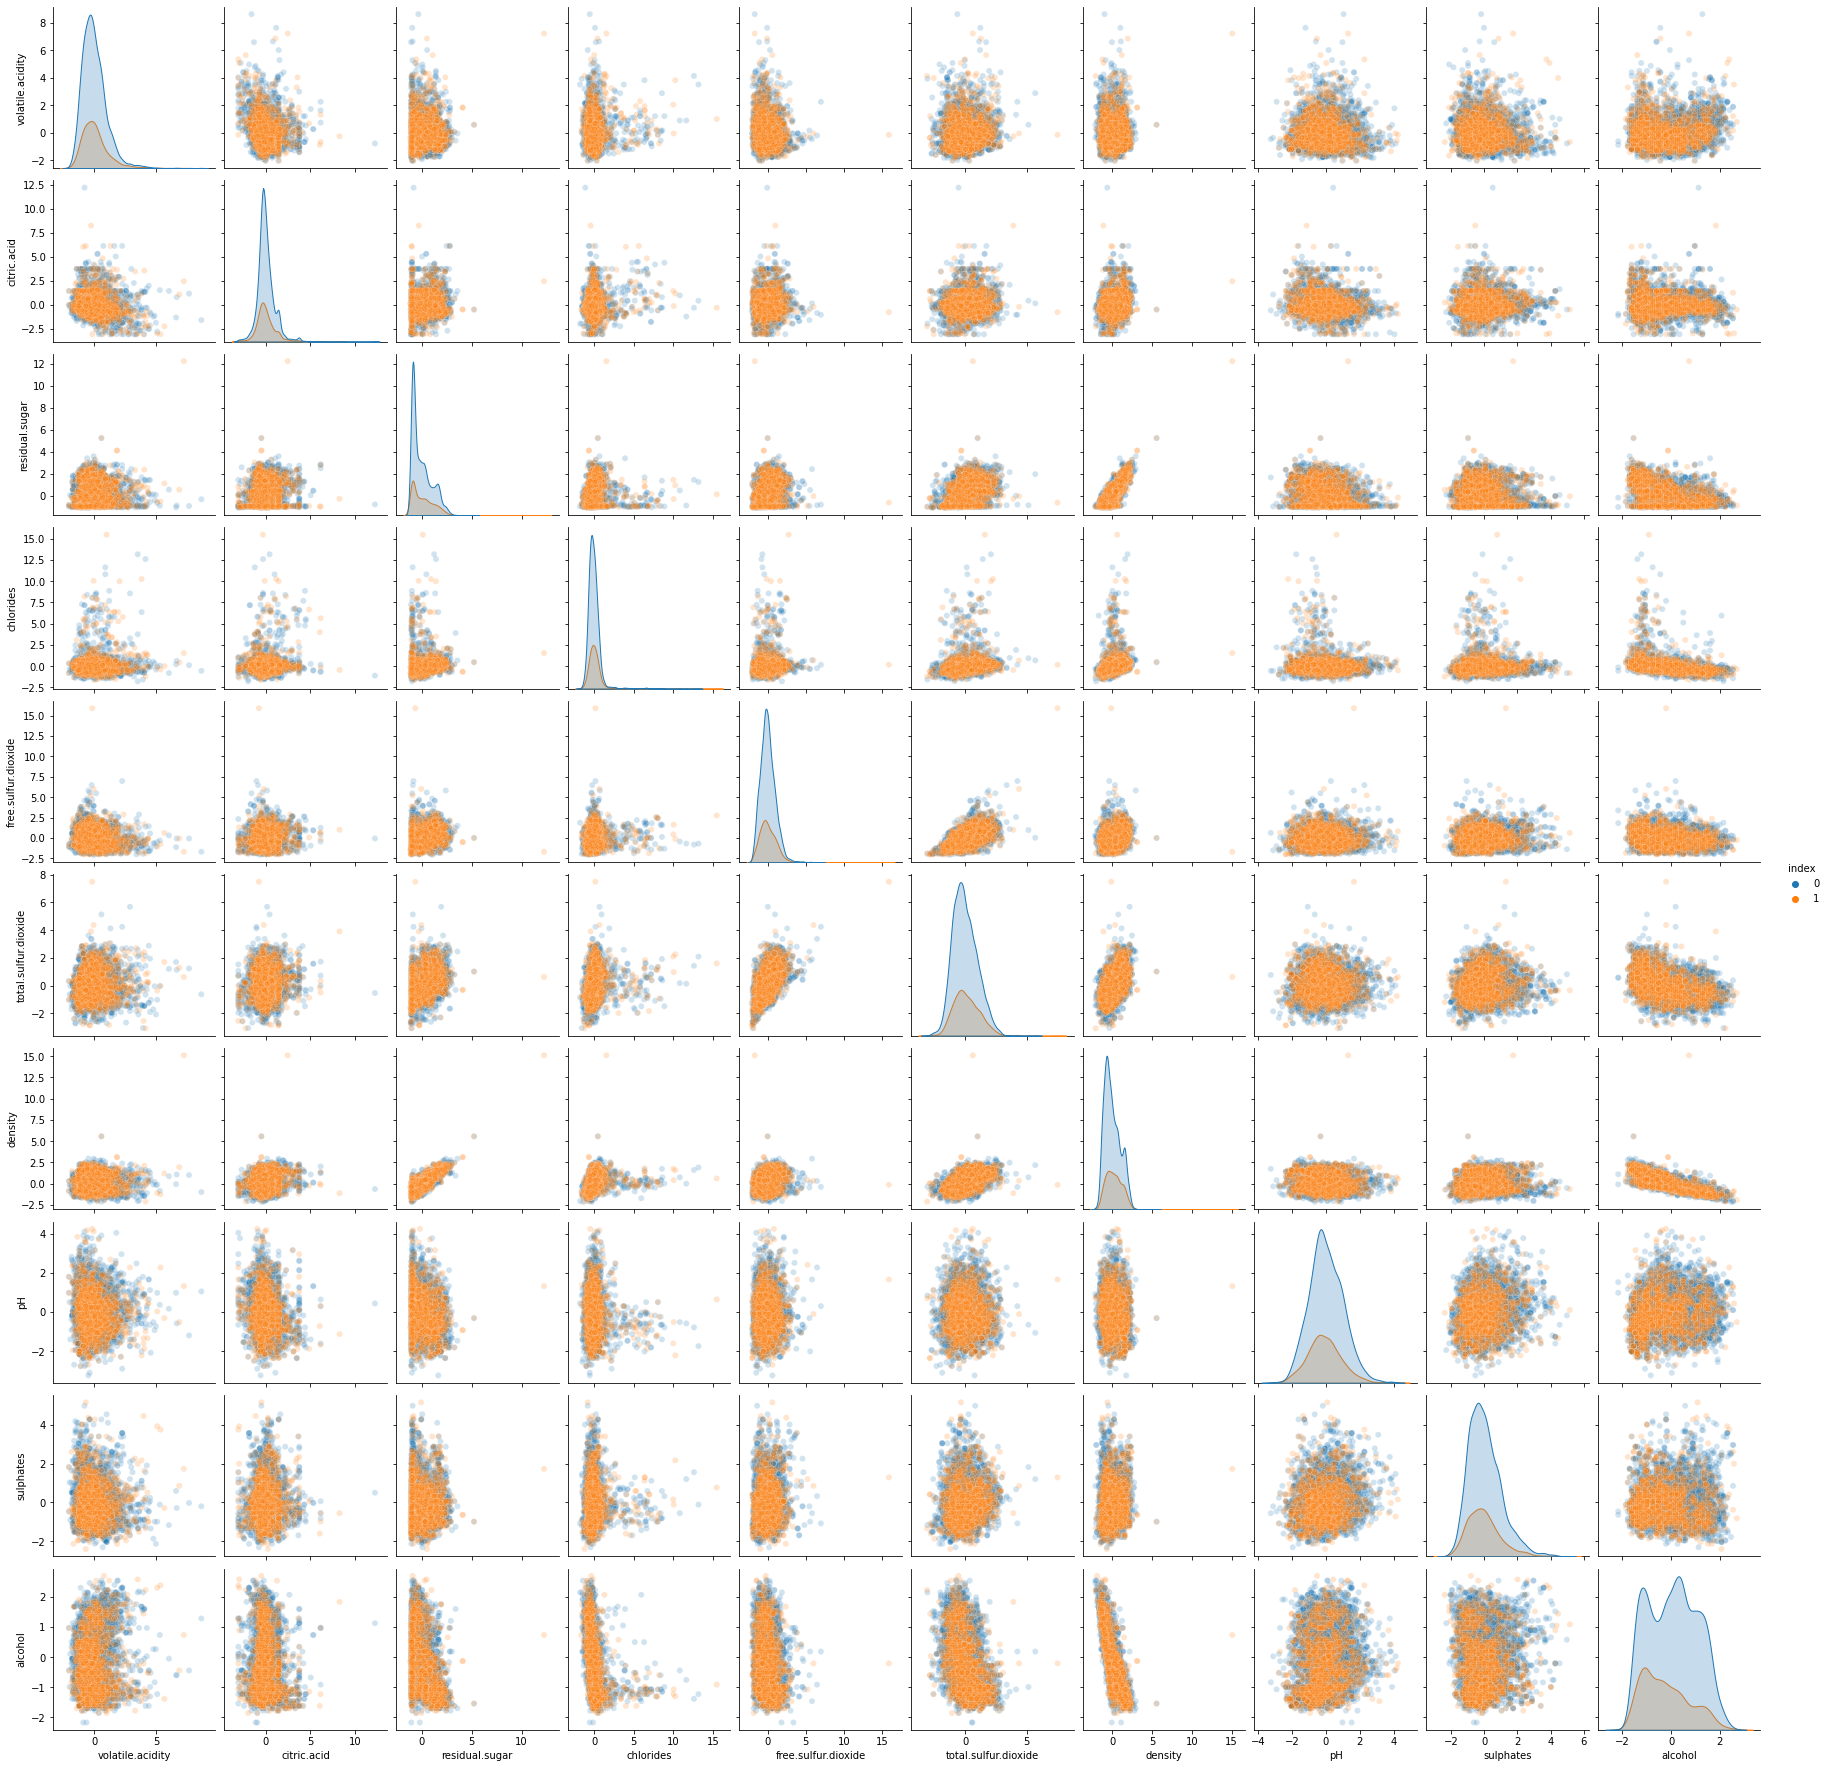

In [370]:
import seaborn as sns
scal['index'] = 0
scal.iloc[-1632:,:]['index'] = 1
sns.pairplot(data=scal.iloc[:,1:], hue='index', plot_kws={'alpha':0.2});

Non si evidenziano differenze sostanziali tra le distribuzioni nel training set e nel test set.

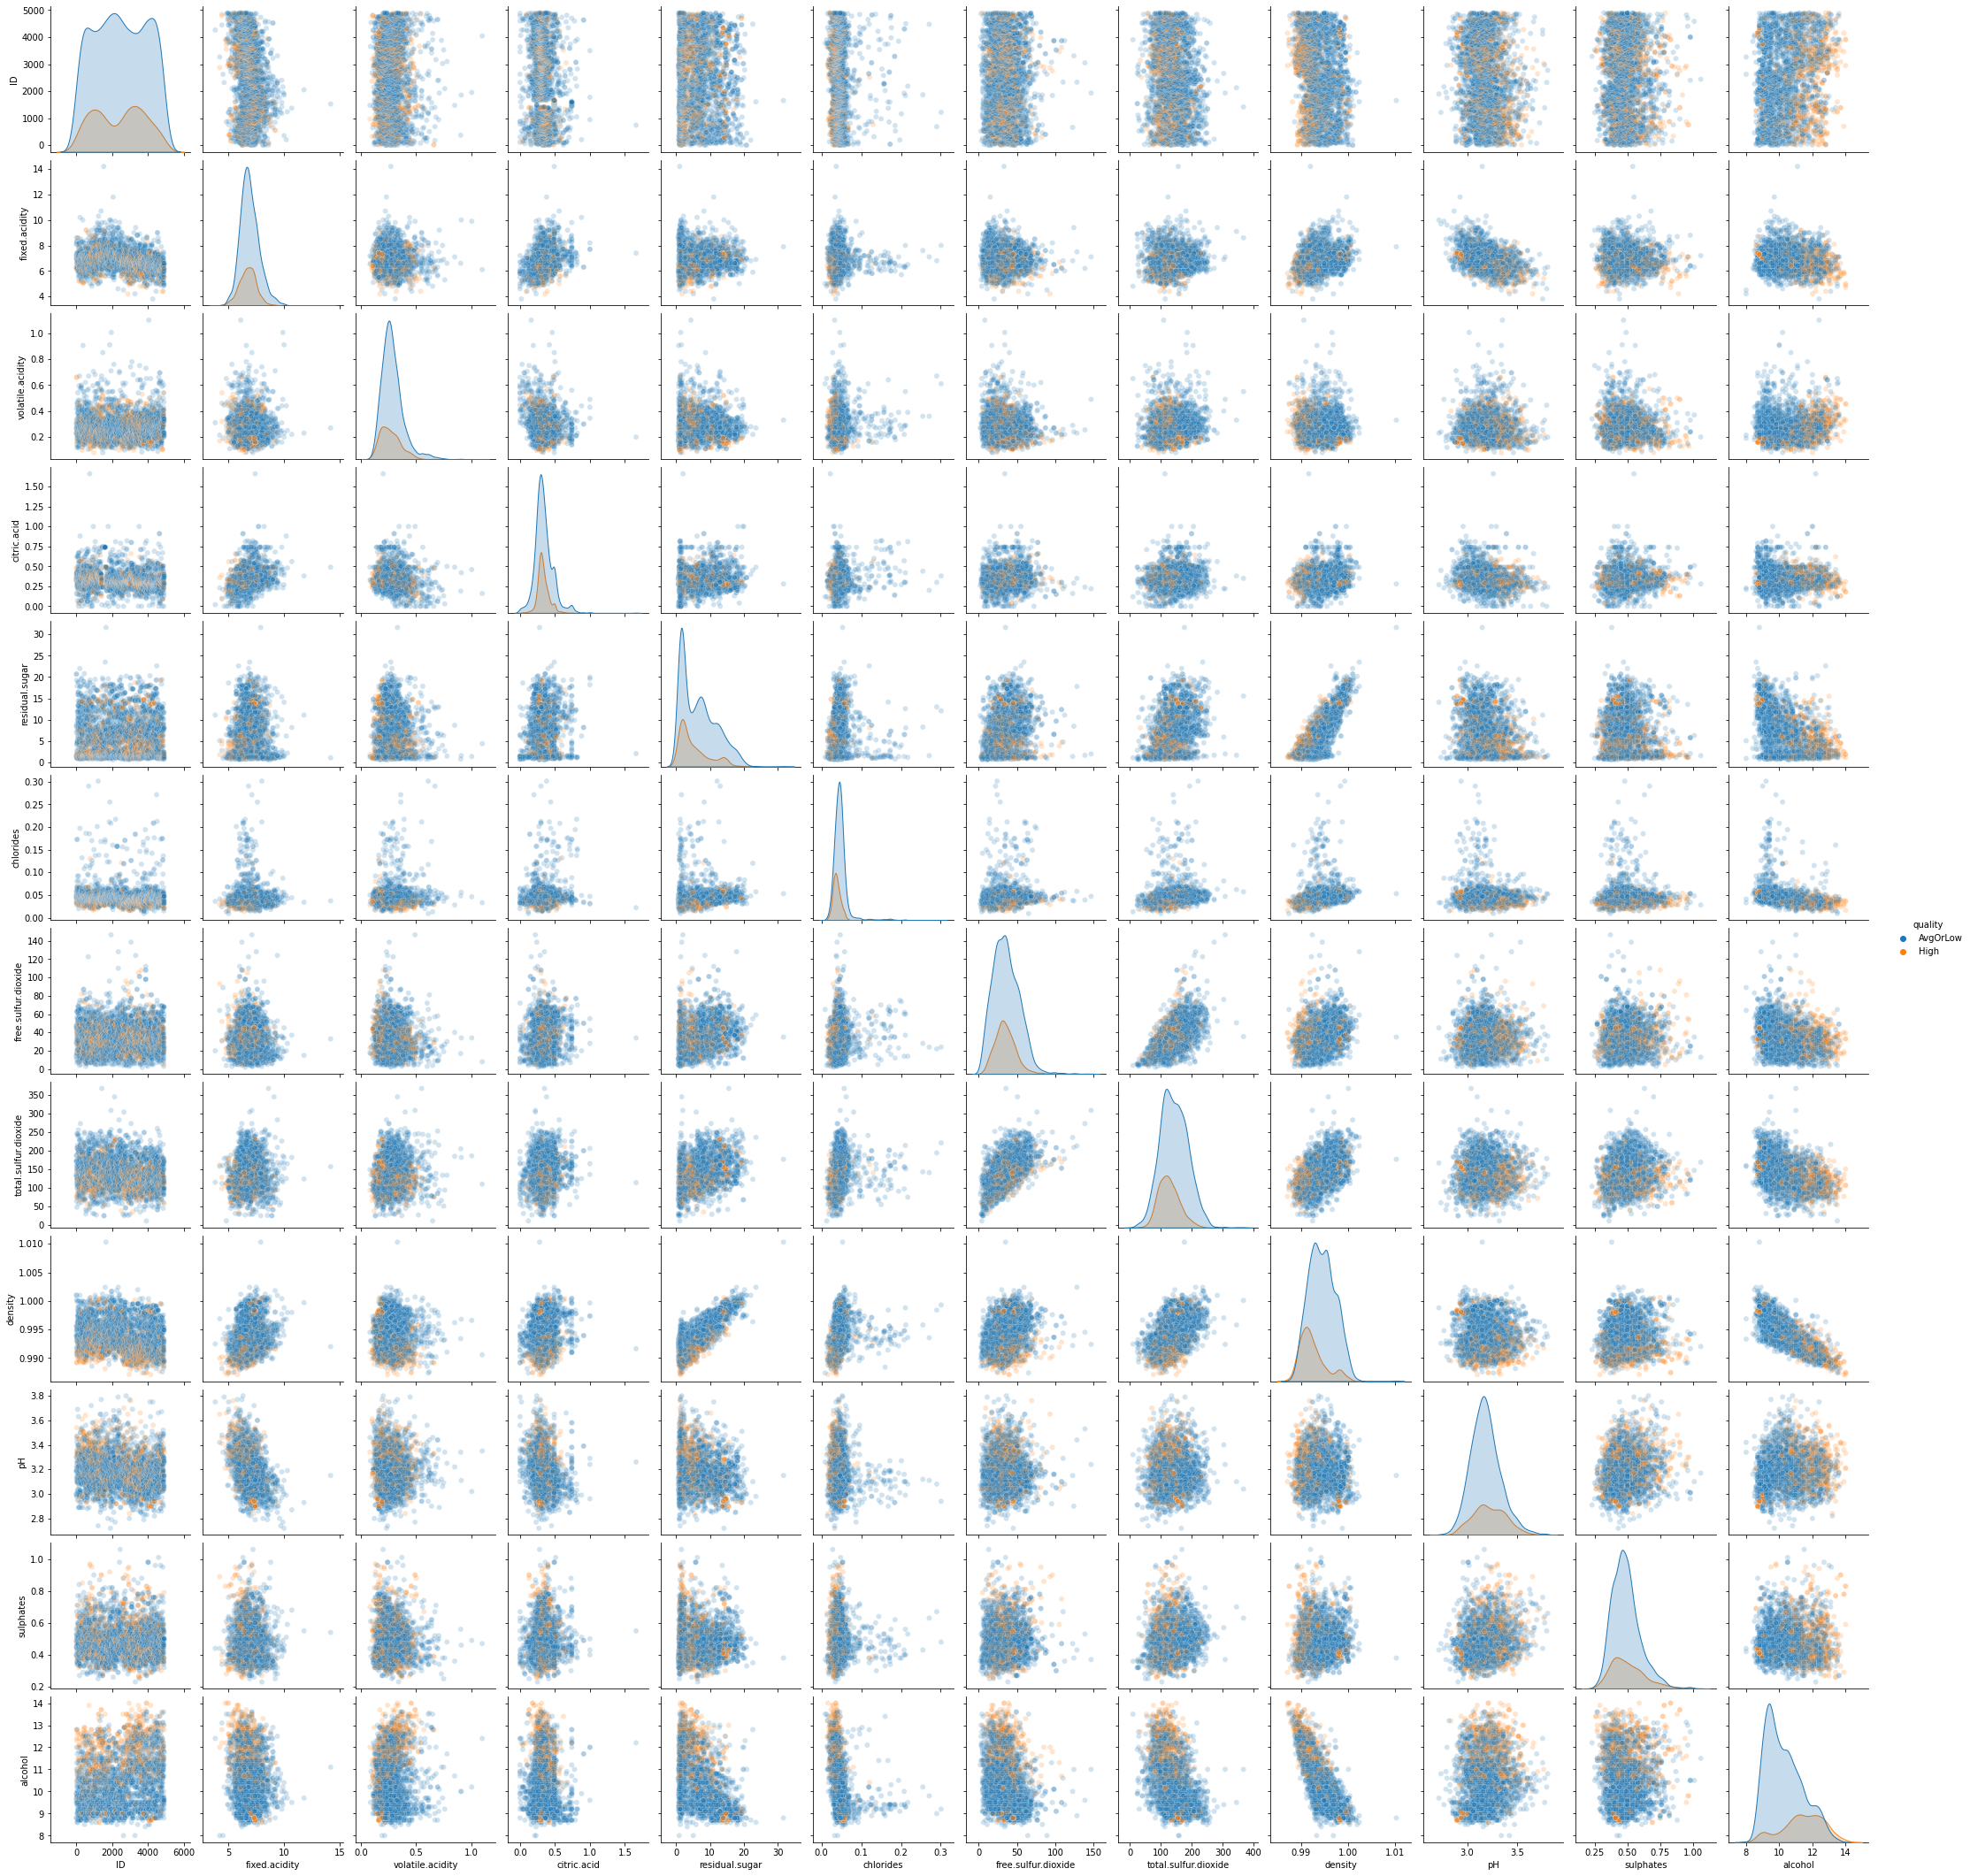

In [15]:
sns.pairplot(data=wine, hue='quality', plot_kws={'alpha':0.2})

Nessuna coppia di caratteristiche produce uno scatterplot che mostra dati linearmente separabili

Una volta operata l'elaborazione preliminare dei dati è possibile suddividere l'insieme di addestramento in train e validation set, in modo da utilizzare i due insiemi ricavati per addestrare e validare i modelli evitando l'overfitting.

In [49]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train, y, test_size = 0.3)

## <span style="color:black">5. AdaBoost<span> <a name="paragraph4"></a>

Il primo metodo utilizzato è l'Adaptive Boosting, o Adaboost, uno tra i più popolari metodi di boosting per la classificazione. I risultati ottenuti con l'albero decisionale come weak learner sono stati migliori rispetto all'utilizzo della regressione lineare.

Gli iperparametri principali del metodo AdaBoost sono stati impostati con una repeated 10 fold cross-validation con 3 ripetizioni:

In [51]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import RepeatedKFold, GridSearchCV

cv = RepeatedKFold(n_splits=10, n_repeats=3) 
parameters = {'n_estimators':[150, 300, 400, 500], 'learning_rate':[0.1,0.05,0.01],}
adaBoost_class_cv = GridSearchCV(AdaBoostClassifier(), parameters, cv=cv, scoring='f1', verbose=1).fit(X_train,y_train)

Fitting 30 folds for each of 12 candidates, totalling 360 fits


In [52]:
adaBoost_class_cv.best_params_

{'learning_rate': 0.1, 'n_estimators': 500}

Il miglior learning rate è risultato essere 0.1, mentre il miglior numero di stumps utilizzati per ogni ripetizione dell'algoritmo è stato 500.

Successivamente, si è applicato l'algoritmo per la previsione del test set, calcolando anche la probabilità di tali previsioni. Questo ha portato alla possibilità di costruire una curva raffigurante il valore dell'f1-score e dell'f2-score al variare della threshold impostata, identificando le soglie che li massimizzassero. La scelta di mostrare anche la soglia che massimizzasse l'f2-score è dovuta alla proprietà fondamentale di tale metrica, che valuta più costosi i falsi negativi rispetto ai falsi positivi, proprietà che risulta utile nel caso in esame, dove una classificazione errata dei vini di alta qualità (falsi positivi) è da ritenersi più costosa.

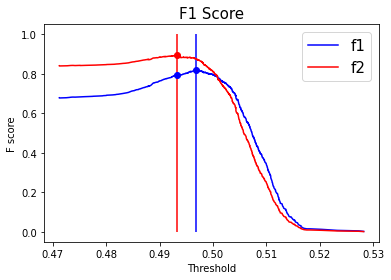

In [371]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

y_pred_ab_prob = adaBoost_class_cv.predict_proba(X_test)
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_ab_prob[:, 1]) 
f1 = 2 * (precision * recall) / (precision + recall)
f2 = 5 * (precision * recall) / ((4*precision) + recall)
plt.title('F1 Score', fontsize=15)
plt.plot(thresholds, f1[:-1], 'b', label='f1')
plt.plot(thresholds, f2[:-1], 'r', label='f2')
plt.ylabel('F score')
plt.xlabel('Threshold')
plt.vlines(x = thresholds[np.argmax(f1)], ymin=0, ymax=1, color='b')
plt.vlines(x = thresholds[np.argmax(f2)], ymin=0, ymax=1, color='r')
plt.plot(thresholds[np.argmax(f1)], np.max(f1), 'bo')
plt.plot(thresholds[np.argmax(f2)], f1[np.argmax(f2)], 'bo')
plt.plot(thresholds[np.argmax(f2)], np.max(f2), 'ro')
plt.legend(fontsize=15)

In [357]:
print('Soglia che massimizza f1-score: ',thresholds[np.argmax(f1[:-2])], '\nSoglia che massimizza f2-score: ', thresholds[np.argmax(f2[:-2])])

Soglia che massimizza f1-score:  0.4969239856471847 
Soglia che massimizza f2-score:  0.4932411403713293


Le due soglie si discostano di circa 0.003, ed è possibile calcolare l'f1-score in corrispondenza di entrambe.

In [372]:
f2_ab = np.max(f2)
y_pred_ab1 = (y_pred_ab_prob[:,1]>thresholds[np.argmax(f1[:-2])]).astype(int)
f1_ab = f1_score(y_pred_ab1, y_test)
print('f1 massimizzato', f1_ab)
y_pred_ab2 = (y_pred_ab_prob[:,1]>thresholds[np.argmax(f2[:-2])]).astype(int)
f1_ab = f1_score(y_pred_ab2, y_test)
print('f1 in corrispondenza di f2 massimizzato', f1_ab)

f1 massimizzato 0.8164924506387922
f1 in corrispondenza di f2 massimizzato 0.7938034188034186


Gli f1-score si discostano di 0.02 circa, pertanto sono piuttosto simili. Si può mostrare la matrice di confusione relativa al risultato che si otterrebbe in caso si scegliesse ugnuna delle due threshold:

In [373]:
from sklearn.metrics import confusion_matrix
pd.DataFrame(confusion_matrix(y_pred_ab1, y_test), index=['Pred AoL', 'Pred High'], columns=['True AoL', 'True High'])

True AoL  True High
Pred AoL        514         62
Pred High       254        703

In [374]:
pd.DataFrame(confusion_matrix(y_pred_ab2, y_test), index=['Pred AoL', 'Pred High'], columns=['True AoL', 'True High'])

True AoL  True High
Pred AoL        404         22
Pred High       364        743

Il risultato ottenuto nel primo caso è complessivamente migliore, ma è da tenersi in conto il fatto che molti dei vini classificati di alta qualità sono stati generati appositamente con il metodo SMOTE, pertanto risulta evidente come sia più semplice classificarli opportunamente. Data la differenza ridotta tra gli f1-score mostrati, però, si può provare ad utilizzare la soglia che massimizza l'f2-score come threshold, per ottenere un risultato migliore nella classificazione dei vini di alta qualità.

In [63]:
y_pred_ab_prob_test = adaBoost_class_cv.predict_proba(test)
y_pred_ab_test = (y_pred_ab_prob_test[:,1]>thresholds[np.argmax(f2[:-2])]).astype(int)

In [258]:
wine_test = pd.read_csv('wine_quality_test.csv')
sol_ab = pd.DataFrame(wine_test['ID'], columns=['ID'])
sol_ab['Pred'] = y_pred_ab_test
sol_ab['Prob'] = y_pred_ab_prob_test[:,1]
sol_ab['Pred'] = sol_ab['Pred'].replace(0, 'AvgOrLow').replace(1, 'High')
sol_ab.to_csv('Santanche_Luca_submission1.csv', index=False)

## <span style="color:black">6. Support Vector Classifier<span> <a name="paragraph5"></a>

Il secondo metodo utilizzato consiste nell'utilizzo dei Support Vector Machines per la classificazione. L'algoritmo utilizzato introduce un'estensione del *maximal margin classifier*, iperpiano che nei problemi di classificazione binaria separa nel miglior modo possibile le due classi. Tale metodo si avvale di un kernel che può essere impostato in diversi modi, ma dopo una serie di tentativi si è optato per il polinomiale, che portava risultati più efficaci.

Anche in questo caso sono numerosi gli iperparametri che si possono impostare, ma si sono scelti, per semplicità computazionale, il grado del polinomio utilizzato come kernel ed il grado di regolarizzazione.

In [76]:
from sklearn.svm import SVC
from sklearn.model_selection import RepeatedKFold, GridSearchCV

cv = RepeatedKFold(n_splits=10, n_repeats=3) 
parameters = {'degree':[3,4,5], 'C':[1,0.5,0.1, 0.05, 0.01]}
svm_class_pol = GridSearchCV(SVC(kernel = 'poly', gamma='auto', probability=True), parameters, cv=cv, scoring='f1', verbose=1).fit(X_train, y_train)
svm_class_pol.best_params_

Fitting 30 folds for each of 15 candidates, totalling 450 fits


{'C': 1, 'degree': 3}

Anche in questo caso il procedimento utilizzato è analogo alla procedura effettuata per l'AdaBoost.

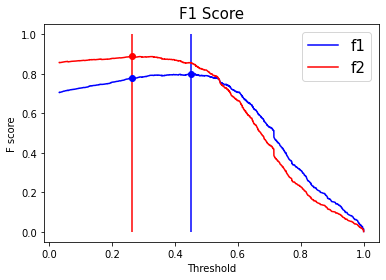

In [375]:
y_pred_pol_prob = svm_class_pol.predict_proba(X_test)
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_pol_prob[:, 1]) 
f1 = 2 * (precision * recall) / (precision + recall)
f2 = 5 * (precision * recall) / ((4*precision) + recall)
plt.title('F1 Score', fontsize=15)
plt.plot(thresholds, f1[:-1], 'b', label='f1')
plt.plot(thresholds, f2[:-1], 'r', label='f2')
plt.ylabel('F score')
plt.xlabel('Threshold')
plt.vlines(x = thresholds[np.argmax(f1)], ymin=0, ymax=1, color='b')
plt.vlines(x = thresholds[np.argmax(f2)], ymin=0, ymax=1, color='r')
plt.plot(thresholds[np.argmax(f1)], np.max(f1), 'bo')
plt.plot(thresholds[np.argmax(f2)], f1[np.argmax(f2)], 'bo')
plt.plot(thresholds[np.argmax(f2)], np.max(f2), 'ro')
plt.legend(fontsize=15)

In [361]:
print('Soglia che massimizza f1-score: ',thresholds[np.argmax(f1)], '\nSoglia che massimizza f2-score: ', thresholds[np.argmax(f2)])

Soglia che massimizza f1-score:  0.45014653059514503 
Soglia che massimizza f2-score:  0.2638181372373183


In [376]:
f2_pol = np.max(f2)
y_pred_pol1 = (y_pred_pol_prob[:,1]>thresholds[np.argmax(f1[:-2])]).astype(int)
f1_pol = f1_score(y_test, y_pred_pol1)
print('f1 massimizzato', f1_pol)
y_pred_pol2 = (y_pred_pol_prob[:,1]>thresholds[np.argmax(f2[:-2])]).astype(int)
f1_pol = f1_score(y_test, y_pred_pol2)
print('f1 in corrispondenza di f2 massimizzato', f1_pol)

f1 massimizzato 0.8004667444574096
f1 in corrispondenza di f2 massimizzato 0.7783558792924036


Nonostante le soglie si discostino sostanzialmente, circa 0.2 è la differenza tra le due, l'f1-score non mostra riduzioni consistenti, discostandosi da quello ottimizzato di circa 0.02.

Si mostrano le matrici di confusione:

In [378]:
pd.DataFrame(confusion_matrix(y_pred_pol1, y_test), index=['Pred AoL', 'Pred High'], columns=['True AoL', 'True High'])

True AoL  True High
Pred AoL        505         79
Pred High       263        686

In [379]:
pd.DataFrame(confusion_matrix(y_pred_pol2, y_test), index=['Pred AoL', 'Pred High'], columns=['True AoL', 'True High'])

True AoL  True High
Pred AoL        359         17
Pred High       409        748

Anche in questo caso la previsione dei vini di alta qualità mostra evidenti miglioramenti e, pertanto, si è deciso di perdere 0.02 di f1-score per migliorare la classificazione richiesta.

In [113]:
y_pred_pol_prob_test = svm_class_pol.predict_proba(test)
y_pred_pol_test = (y_pred_pol_prob_test[:,1]>thresholds[np.argmax(f2[:-2])]).astype(int)

In [259]:
wine_test = pd.read_csv('wine_quality_test.csv')
sol_pol = pd.DataFrame(wine_test['ID'], columns=['ID'])
sol_pol['Pred'] = y_pred_pol_test
sol_pol['Prob'] = y_pred_pol_prob_test[:,1]
sol_pol['Pred'] = sol_pol['Pred'].replace(0, 'AvgOrLow').replace(1, 'High')
sol_pol.to_csv('Santanche_Luca_submission3.csv', index=False)

## <span style="color:black">7. XGBoost<span> <a name="paragraph6"></a>

Il terzo metodo scelto è l'Extreme Gradient Boosting, o XGBoost, metodo di boosting per la classificazione. Tale metodo consiste in un'implementazione avanzata del Gradient Boosting che comprende, tra gli altri miglioramenti, delle regolarizzazioni che ne riducono overfitting e ne migliorano le prestazioni complessive. 

L'XGBoost ha una moltitudine incredibile di iperparametri ma, dopo una serie di tentativi, si sono impostati 500 stimatori ed un learning rate pari a 0.1. Per la valutazione dell'efficacia del metodo si è operata una repeated 10 fold cross-validation con 3 ripetizioni.

In [94]:
import xgboost as xgb

n_estimators = [500]
cv = RepeatedKFold(n_splits=10, n_repeats=3) 

xgb_class = xgb.XGBClassifier(use_label_encoder=False, eval_metric = 'merror', learning_rate=0.1)

parameters = {'n_estimators' : n_estimators}
xg_cv = GridSearchCV(xgb_class, parameters, cv = cv, scoring='f1', verbose=1).fit(X_train, y_train)

Fitting 30 folds for each of 1 candidates, totalling 30 fits


In [96]:
xg_cv.best_params_

{'n_estimators': 500}

Il procedimento adoperato per la scelta della soglia ottimale segue ancora una volta la stessa strategia operata per gli algoritmi precedenti.

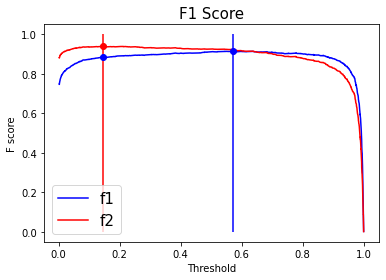

In [380]:
y_pred_xg_prob = xg_cv.predict_proba(X_test)
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_xg_prob[:, 1]) 
f1 = 2 * (precision * recall) / (precision + recall)
f2 = 5 * (precision * recall) / ((4*precision) + recall)
plt.title('F1 Score', fontsize=15)
plt.plot(thresholds, f1[:-1], 'b', label='f1')
plt.plot(thresholds, f2[:-1], 'r', label='f2')
plt.ylabel('F score')
plt.xlabel('Threshold')
plt.vlines(x = thresholds[np.argmax(f1)], ymin=0, ymax=1, color='b')
plt.vlines(x = thresholds[np.argmax(f2)], ymin=0, ymax=1, color='r')
plt.plot(thresholds[np.argmax(f1)], np.max(f1), 'bo')
plt.plot(thresholds[np.argmax(f2)], f1[np.argmax(f2)], 'bo')
plt.plot(thresholds[np.argmax(f2)], np.max(f2), 'ro')
plt.legend(fontsize=15)

In [367]:
print('Soglia che massimizza f1-score: ',thresholds[np.argmax(f1)], '\nSoglia che massimizza f2-score: ', thresholds[np.argmax(f2)])

Soglia che massimizza f1-score:  0.57010937 
Soglia che massimizza f2-score:  0.14693955


In [381]:
f2_xg = np.max(f2)
y_pred_xg1 = (y_pred_xg_prob[:,1]>thresholds[np.argmax(f1)]).astype(int)
f1_xg = f1_score(y_pred_xg1, y_test)
print('f1 massimizzato', f1_xg)
y_pred_xg2 = (y_pred_xg_prob[:,1]>thresholds[np.argmax(f2)]).astype(int)
f1_xg = f1_score(y_pred_xg2, y_test)
print('f1 in corrispondenza di f2 massimizzato', f1_xg)

f1 massimizzato 0.9137709137709137
f1 in corrispondenza di f2 massimizzato 0.8831168831168831


Sebbene le soglie si presentino molto distanti tra loro, la differenza tra gli f1-score risulta pari a 0.03, evidenziando che l'algoritmo prende decisioni con probabilità mediamente più alte degli algoritmi precedenti.

Anche in questo caso si mostrano le matrici di confusione:

In [382]:
pd.DataFrame(confusion_matrix(y_pred_xg1, y_test), index=['Pred AoL', 'Pred High'], columns=['True AoL', 'True High'])

True AoL  True High
Pred AoL        689         55
Pred High        79        710

In [383]:
pd.DataFrame(confusion_matrix(y_pred_xg2, y_test), index=['Pred AoL', 'Pred High'], columns=['True AoL', 'True High'])

True AoL  True High
Pred AoL        587         17
Pred High       181        748

In questo caso la matrice di confusione mostra risultati buoni anche nel caso in cui la threshold scelta sia quella che massimizza l'f2-score. Pertanto, anche per il metodo dell'XGBoost si è optato per mantenere come threshold quest'ultima.

In [120]:
y_pred_xg_prob_test = xg_cv.predict_proba(test)
y_pred_xg_test = (y_pred_xg_prob_test[:,1]>thresholds[np.argmax(f2[:-2])]).astype(int)

In [260]:
wine_test = pd.read_csv('wine_quality_test.csv')
sol_xg = pd.DataFrame(wine_test['ID'], columns=['ID'])
sol_xg['Pred'] = y_pred_xg_test
sol_xg['Prob'] = y_pred_xg_prob_test[:,1]
sol_xg['Pred'] = sol_xg['Pred'].replace(0, 'AvgOrLow').replace(1, 'High')
sol_xg.to_csv('Santanche_Luca_submission2.csv', index=False)

## <span style="color:black">8. Conclusioni<span> <a name="conclusions"></a>

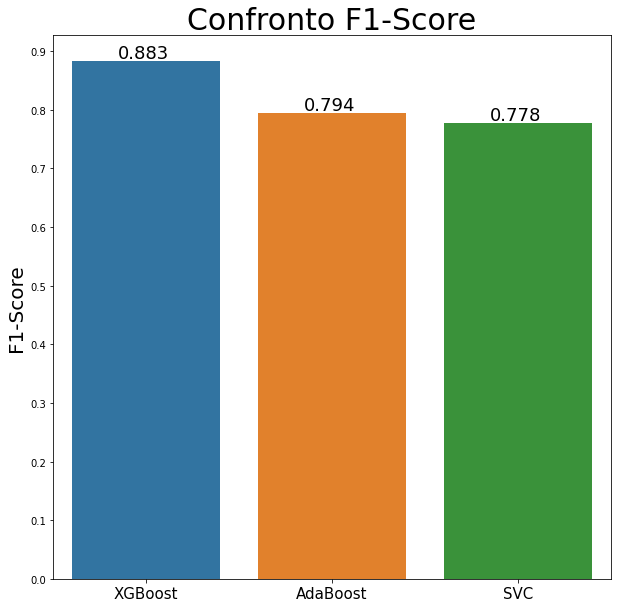

In [350]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
f1s = [f1_xg, f1_ab, f1_pol]
sns.barplot(x=['XGBoost', 'AdaBoost', 'SVC'], y=f1s)
plt.yticks(np.arange(0,1,0.1));
plt.ylabel('F1-Score', size=20);
xlocs, xlabs = plt.xticks(fontsize=15)
f1sr = np.round(f1s, decimals=3)
for i, v in enumerate(f1sr):
    plt.text(xlocs[i]-0.15, v+0.005, str(v), fontsize=18)

plt.title('Confronto F1-Score', size=30);


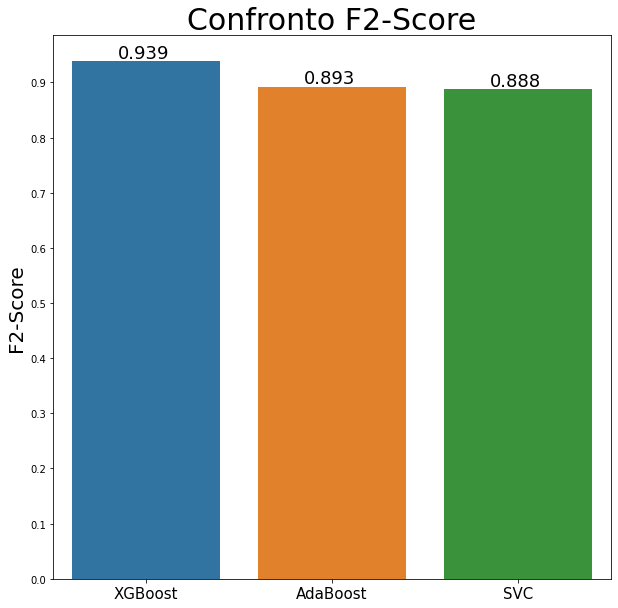

In [349]:
plt.figure(figsize=(10,10))
f2s = [f2_xg, f2_ab, f2_pol]
sns.barplot(x=['XGBoost', 'AdaBoost', 'SVC'], y=f2s)
plt.yticks(np.arange(0,1,0.1));
plt.ylabel('F2-Score', size=20);
f2sr = np.round(f2s, decimals=3)
xlocs, xlabs = plt.xticks(fontsize=15)
for i, v in enumerate(f2sr):
    plt.text(xlocs[i]-0.15, v+0.005, str(v), fontsize=18)

plt.title('Confronto F2-Score', size=30);

Complessivamente i risultati migliori sono stati, sia in termini di f2-score sia in termini di f1-score, del metodo XGBoost. Chiaramente, ciò non implica che il modello predica meglio i vini di alta qualità, poiché potrebbe essere soggetto ad overfitting.